# Load data

## Download data

In [2]:
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

## Extract data

In [3]:
# !tar xvzf aclImdb_v1.tar.gz

## Read data from text files to pandas dataframe

In [4]:
import os

def fetch_reviews(path):
    data = []
    #path = 'aclImdb/train/pos/'
    files = [f for f in os.listdir(path)]
    for file in files:
        with open(path+file, "r", encoding='utf8') as f:
            data.append(f.read())
        
    return data

In [5]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('../../data/aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('../../data/aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('../../data/aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('../../data/aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


# Exploratory Data Analysis

## Check number of reviews is empty

In [6]:
df['review'].isnull().sum()

0

## Check balance of positive and negative reviews

In [7]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


## Sample positive and negative reviews

In [8]:
# Positive
print(df[df['label']==1].sample(n=1)['review'].iloc[0])
print('-----------------')
# Negative
print(df[df['label']==0].sample(n=1)['review'].iloc[0])

I watch this movie at the start of every summer, and it never ceases to amuse me. Here the jokes are packed in near every line of dialogue, giving you more bang than the average Simpsons episode. Some of the jokes fall flat or will only elicit a slight chuckle, but others will leave you rolling and then there are those that stick in your brain... "The audience is now deaf."<br /><br />The video knows it's a video, and makes no pretensions about being anything else. It's easy to sit back and let the bombardment of humor begin. A good mix of slapstick, pop culture, and tongue-in-cheek comedy ensures there's something for everybody. I was in sixth grade when I first saw this video, and I have to admit I still find it as hilarious now that I've started college.<br /><br />This is a good movie to watch over the summer, much in the way you might watch "It's a Wonderful Life" at Christmas or "Ten Commandments" at Easter/Passover. More than that, it's just funny as hell.
-----------------
Mild

## Count number of words in each review and plot histogram

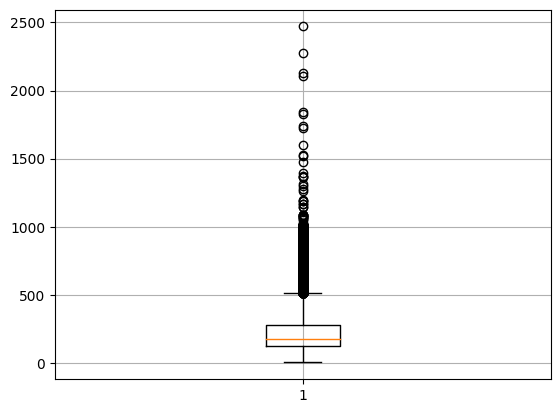

In [9]:
from matplotlib import pyplot as plt

df['word_counts'] = df['review'].apply(lambda x: len(x.split()))

df['word_counts'].describe()

plt.boxplot(df['word_counts'].values)
plt.grid(True)
plt.show()

# Data Processing

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

## Text lower, cleaning, tokenization and lemmatization

In [11]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words and digits
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = word_tokenize(review) # converts review to tokens
    
    # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [12]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,word_counts,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,140,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,428,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,147,brilliant acting lesley ann warren best dramat...
3,This is easily the most underrated film inn th...,1,124,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,120,not typical mel brook film much le slapstick m...


## Positive Reviews Wordcloud

In [13]:
from wordcloud import WordCloud

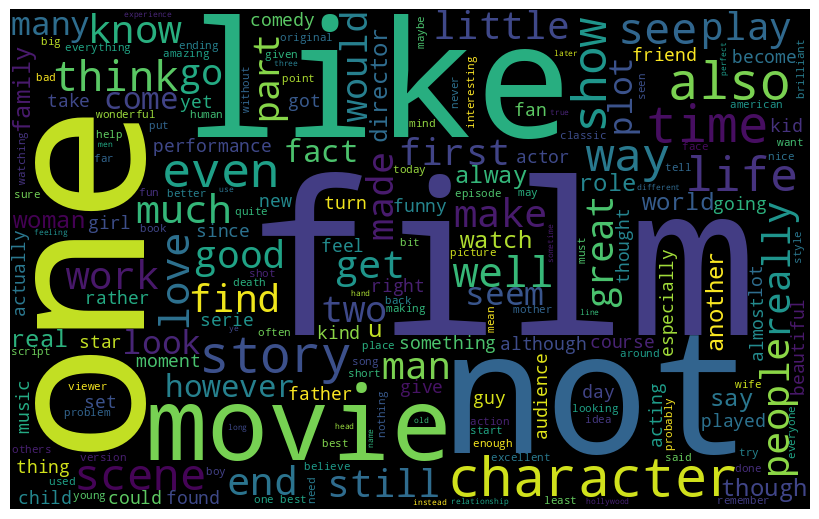

In [14]:
words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                    width=800, height = 500,            
                    stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Negative Reviews Wordcloud

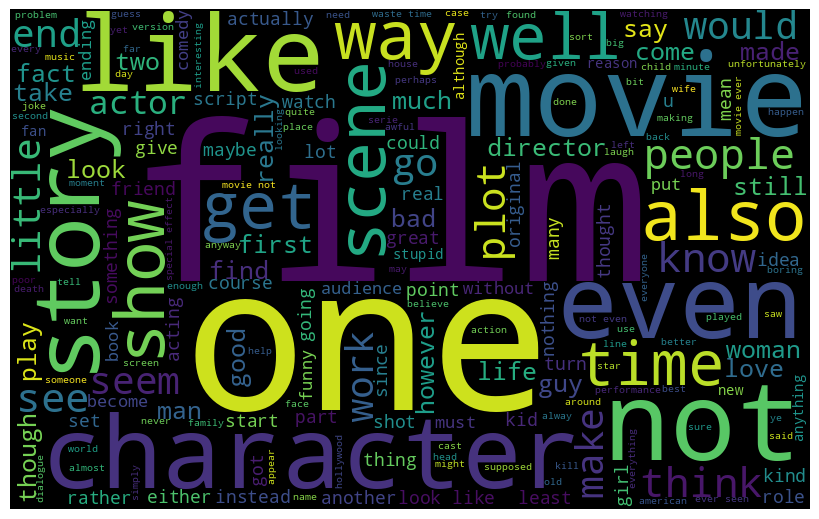

In [15]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                    width=800, height = 500,            
                    stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 3) (35000,)
Test data: (15000, 3) (15000,)


# Vectorize text data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Bag of Words (BOW)

In [19]:
vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19468)
X_test_review_bow shape:  (15000, 19468)


## Term Frequency - Inverse Document Frequency (TF-IDF)

In [20]:
vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19468)
X_test_review_tfidf shape:  (15000, 19468)


# Model Building

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn  as sns

## Naive Bayes

### Bag of Words (BOW)

In [22]:
naive_bayes_bow_model = MultinomialNB()

naive_bayes_bow_model.fit(X_train_review_bow, y_train)

MultinomialNB()

In [23]:
naive_bayes_bow_y_pred = naive_bayes_bow_model.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, naive_bayes_bow_y_pred)) 

Test Accuracy:  0.8551333333333333


### Term Frequency - Inverse Document Frequency (TF-IDF)

In [24]:
naive_bayes_tf_idf_model = MultinomialNB()

naive_bayes_tf_idf_model.fit(X_train_review_tfidf, y_train)

MultinomialNB()

In [40]:
naive_bayes_tf_idf_y_pred = naive_bayes_bow_model.predict(X_test_review_tfidf) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, naive_bayes_tf_idf_y_pred)) 

Test Accuracy:  0.8473333333333334


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### Bag of Words (BOW)

In [27]:
logistic_regression_bow_model_0 = LogisticRegression(penalty=None, solver='saga')
logistic_regression_bow_model_0.fit(X_train_review_bow, y_train)

LogisticRegression(penalty=None, solver='saga')

In [28]:
logistic_regression_bow_model_1 = LogisticRegression(penalty='l1', solver='saga')
logistic_regression_bow_model_1.fit(X_train_review_bow, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [29]:
logistic_regression_bow_model_2 = LogisticRegression(penalty='l2', solver='saga')
logistic_regression_bow_model_2.fit(X_train_review_bow, y_train)

LogisticRegression(solver='saga')

In [30]:
# logistic_regression_bow_model_3 = LogisticRegression(penalty='elasticnet', solver='saga')
# logistic_regression_bow_model_3.fit(X_train_review_bow, y_train)

In [31]:
logistic_regression_bow_model_0_y_pred = logistic_regression_bow_model_0.predict(X_test_review_bow)
print('Test Accuracy None: ', accuracy_score(y_test, logistic_regression_bow_model_0_y_pred))

logistic_regression_bow_model_1_y_pred = logistic_regression_bow_model_1.predict(X_test_review_bow)
print('Test Accuracy Lasso: ', accuracy_score(y_test, logistic_regression_bow_model_1_y_pred))

logistic_regression_bow_model_2_y_pred = logistic_regression_bow_model_2.predict(X_test_review_bow)
print('Test Accuracy Ridge: ', accuracy_score(y_test, logistic_regression_bow_model_2_y_pred))

# logistic_regression_bow_model_3_y_pred = logistic_regression_bow_model_3.predict(X_test_review_bow)
# print('Test Accuracy Both: ', accuracy_score(y_test, logistic_regression_bow_model_3_y_pred))


Test Accuracy None:  0.8873333333333333
Test Accuracy Lasso:  0.8883333333333333
Test Accuracy Ridge:  0.8878


### Term Frequency - Inverse Document Frequency (TF-IDF)

In [32]:
logistic_regression_tf_idf_model_0 = LogisticRegression(penalty=None, solver='saga')
logistic_regression_tf_idf_model_0.fit(X_train_review_tfidf, y_train)

LogisticRegression(penalty=None, solver='saga')

In [33]:
logistic_regression_tf_idf_model_1 = LogisticRegression(penalty='l1', solver='saga')
logistic_regression_tf_idf_model_1.fit(X_train_review_tfidf, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [34]:
logistic_regression_tf_idf_model_2 = LogisticRegression(penalty='l2', solver='saga')
logistic_regression_tf_idf_model_2.fit(X_train_review_tfidf, y_train)

LogisticRegression(solver='saga')

In [35]:
# logistic_regression_tf_idf_model_3 = LogisticRegression(penalty='elasticnet', solver='saga')
# logistic_regression_tf_idf_model_3.fit(X_train_review_tfidf, y_train)

In [36]:
logistic_regression_tf_idf_model_0_y_pred = logistic_regression_tf_idf_model_0.predict(X_test_review_tfidf)
print('Test Accuracy None: ', accuracy_score(y_test, logistic_regression_tf_idf_model_0_y_pred))

logistic_regression_tf_idf_model_1_y_pred = logistic_regression_tf_idf_model_1.predict(X_test_review_tfidf)
print('Test Accuracy Lasso: ', accuracy_score(y_test, logistic_regression_tf_idf_model_1_y_pred))

logistic_regression_tf_idf_model_2_y_pred = logistic_regression_tf_idf_model_2.predict(X_test_review_tfidf)
print('Test Accuracy Ridge: ', accuracy_score(y_test, logistic_regression_tf_idf_model_2_y_pred))

# logistic_regression_tf_idf_model_3_y_pred = logistic_regression_tf_idf_model_3.predict(X_test_review_tfidf)
# print('Test Accuracy Both: ', accuracy_score(y_test, logistic_regression_tf_idf_model_3_y_pred))

Test Accuracy None:  0.8730666666666667
Test Accuracy Lasso:  0.8839333333333333
Test Accuracy Ridge:  0.8924666666666666


# Conclusion

In [37]:
from prettytable import PrettyTable

In [42]:
x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Regularization', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '', f'{accuracy_score(y_test, naive_bayes_bow_y_pred)}'])
x.add_row(['TFIDF', 'Naive Bayes', '', f'{accuracy_score(y_test, naive_bayes_tf_idf_y_pred)}'])
x.add_row(['BOW', 'Logistic Regression', 'None', f'{accuracy_score(y_test, logistic_regression_bow_model_0_y_pred)}'])
x.add_row(['BOW', 'Logistic Regression', 'Lasso', f'{accuracy_score(y_test, logistic_regression_bow_model_1_y_pred)}'])
x.add_row(['BOW', 'Logistic Regression', 'Ridge', f'{accuracy_score(y_test, logistic_regression_bow_model_2_y_pred)}'])
x.add_row(['TFIDF', 'Logistic Regression', 'None', f'{accuracy_score(y_test, logistic_regression_tf_idf_model_0_y_pred)}'])
x.add_row(['TFIDF', 'Logistic Regression', 'Lasso', f'{accuracy_score(y_test, logistic_regression_tf_idf_model_1_y_pred)}'])
x.add_row(['TFIDF', 'Logistic Regression', 'Ridge', f'{accuracy_score(y_test, logistic_regression_tf_idf_model_2_y_pred)}'])
print(x)

+------------+---------------------+----------------+--------------------+
| Vectorizer |        Model        | Regularization |      Accuracy      |
+------------+---------------------+----------------+--------------------+
|    BOW     |     Naive Bayes     |                | 0.8551333333333333 |
|   TFIDF    |     Naive Bayes     |                | 0.8473333333333334 |
|    BOW     | Logistic Regression |      None      | 0.8873333333333333 |
|    BOW     | Logistic Regression |     Lasso      | 0.8883333333333333 |
|    BOW     | Logistic Regression |     Ridge      |       0.8878       |
|   TFIDF    | Logistic Regression |      None      | 0.8730666666666667 |
|   TFIDF    | Logistic Regression |     Lasso      | 0.8839333333333333 |
|   TFIDF    | Logistic Regression |     Ridge      | 0.8924666666666666 |
+------------+---------------------+----------------+--------------------+
